<a href="https://colab.research.google.com/github/Shihadkp/ML-day-4/blob/main/logistic_regression_valentine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl http://www.codeheroku.com/static/workshop/datasets/student_scores.csv -o student_scores.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   151  100   151    0     0    941      0 --:--:-- --:--:-- --:--:--   943


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("valentine_dataset.csv")
df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


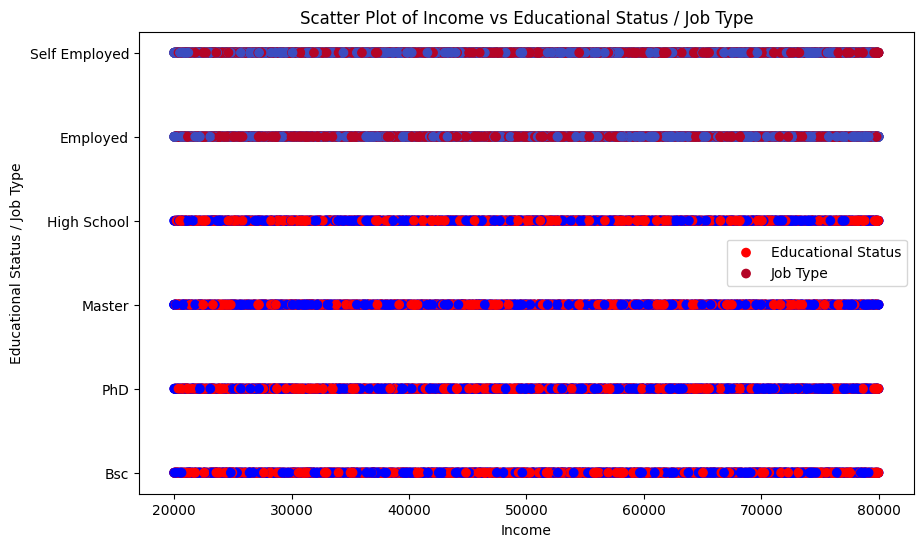

In [ ]:
x = df["Income"]
educational_status = df["Educational_Status"]
job_type = df["Job_Type"]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(x, educational_status, c=df["Valentine_Date"], cmap='bwr', label="Educational Status")
plt.scatter(x, job_type, c=df["Valentine_Date"], cmap='coolwarm', label="Job Type")
plt.xlabel("Income")
plt.ylabel("Educational Status / Job Type")
plt.title("Scatter Plot of Income vs Educational Status / Job Type")
plt.legend()
plt.show()



In [ ]:
def sigmoid(z):

    return 1 / (1+ np.exp(-z))

In [ ]:
def logistic_regression(all_x, all_y, m, b):
    for x, y_actual in zip(all_x, all_y):
        y_pred = sigmoid(m * x + b)
        error = y_pred - y_actual

        delta_m = -1 * (error * x) * 0.05
        delta_b = -1 * (error) * 0.05

        m = m + delta_m
        b = b + delta_b

    return m, b

# Example usage:
# all_x = ...
# all_y = ...
# m, b = logistic_regression(all_x, all_y, initial_m, initial_b)


In [ ]:
m = 0
b = 0
for i in range(0,100):
    m,b = logistic_regression(x,y,m,b)
m,b

(245210700511.4959, 4913672.724999209)

In [ ]:
### Helper function use when needed
def get_sigmoid(X,m,b):
    sig = []
    for x in X.values:
        y = sigmoid(m*x + b)
        sig.append(y)

    return sig

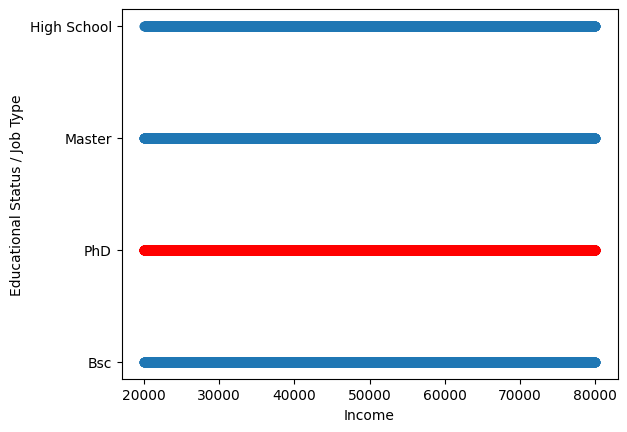

In [ ]:
plt.plot(x, educational_status, 'o')
plt.xlabel("Income")
plt.ylabel("Educational Status / Job Type")

sig = sigmoid(m * x + b)  # Assuming sigmoid function is defined
plt.plot(x, sig, 'ro')
plt.show()


In [ ]:
def predict(x, m, b):
    y = sigmoid(m * x + b)

    if y > 0.5:
        return 1
    else:
        return 0

df["Predictions"] = df["Income"].apply(lambda x: predict(x, m, b))
print(df)


                  Name  Age  Gender  Income  Appearance_Score  \
0            Leon Cruz   26    Male   77648             63.94   
1         Samuel Brown   23    Male   71617              2.50   
2           Lori Baker   34    Male   38616             27.50   
3      Tina Fitzgerald   37    Male   79473             22.32   
4        Jason Simmons   38    Male   43510             73.65   
...                ...  ...     ...     ...               ...   
19995     Michael Vega   26  Female   36355             65.62   
19996       Debra Horn   21  Female   55355             32.17   
19997    Aaron Burgess   31    Male   31910             45.02   
19998   Rebecca Morton   33  Female   22483             73.67   
19999       Erik Curry   21    Male   51812             50.02   

       Interests_Score  Confidence_Score Educational_Status       Job_Type  \
0                88.18             30.09                Bsc       Employed   
1                49.98             76.45                Bsc    